#  Detecção de Fraude em Cartão de Crédito 

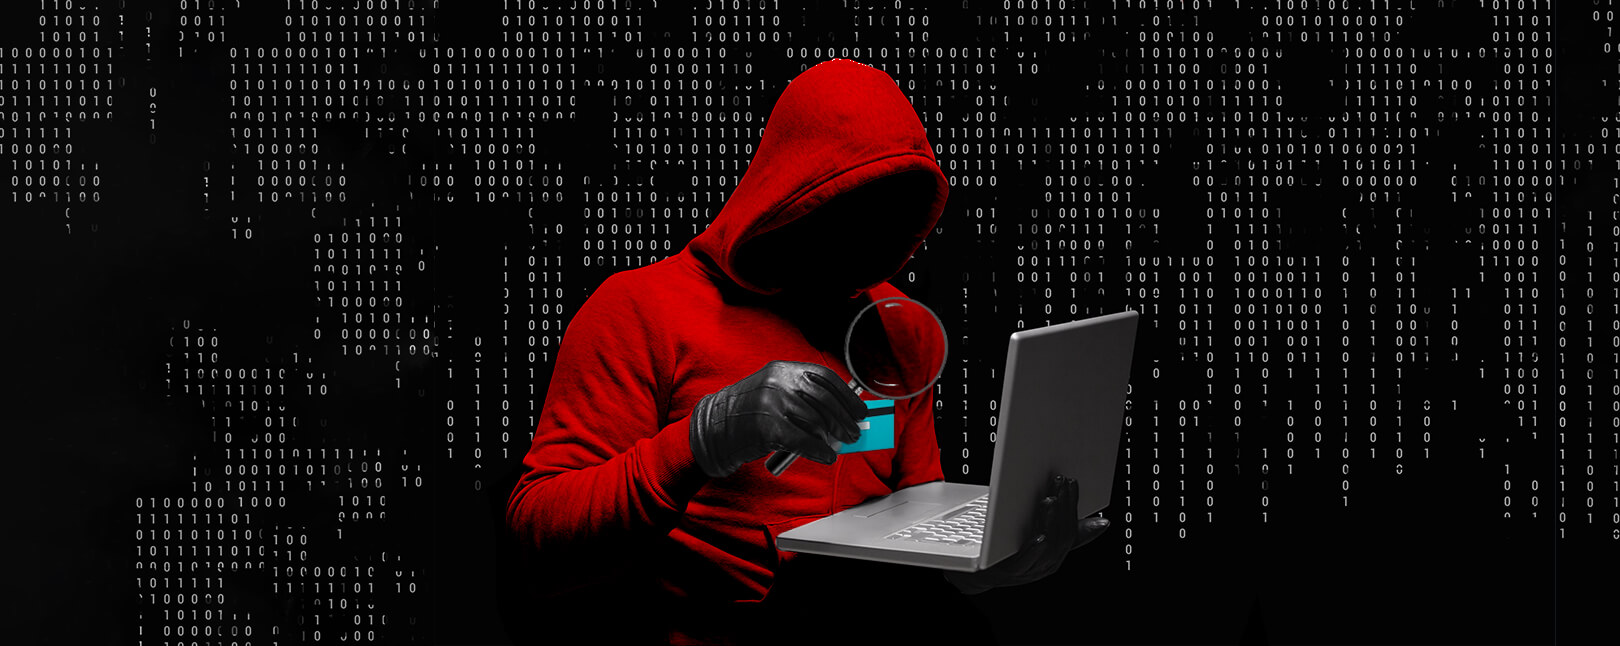

### <font color="#483D8B"> Bibliotecas necessárias </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

### <font color="#483D8B">Carregando os dados </font>

In [2]:
df = pd.read_csv('creditcard.csv')

###  <font color="#483D8B">Análise Macro </font>

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### <font color="#483D8B">Desequilíbrio nos dados </font>

In [21]:
# Determinar o número de casos de fraude no dataset
fraud = df[df['Class']== 1]
valid = df[df['Class']== 0]
outlier = len(fraud)/float(len(valid))
print(outlier)
print('Fraud Cases:{}'.format(len(df[df['Class']== 1])))
print('Valid Transactions:{}'.format(len(df[df['Class']== 0])))                        


0.0017304750013189597
Fraud Cases:492
Valid Transactions:284315


 <b><font color="#8B0000">Transações fraudulentas:</b></font> apenas 0,17% foram realizadas.

Isso mostra que os dados estão altamente desequilibrados



In [7]:
# Transação Fraudulenta
print('Detalhes do valor da transação fraudulenta')
fraud.Amount.describe()

Detalhes do valor da transação fraudulenta


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
# Transação Normal
print('Detalhes do valor da transação válida')
valid.Amount.describe()

Detalhes do valor da transação válida


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Podemos notar que a média de transações fraudulentas em dinheiro é maior, tornando esse problema crucial de lidar. 

###  <font color="#483D8B">Plotando a matriz </font>

A matriz de correlação nos dá uma ideia de como os recursos se correlacionam entre si e pode ajudar a prever quais são os recursos mais relevantes para a previsão.

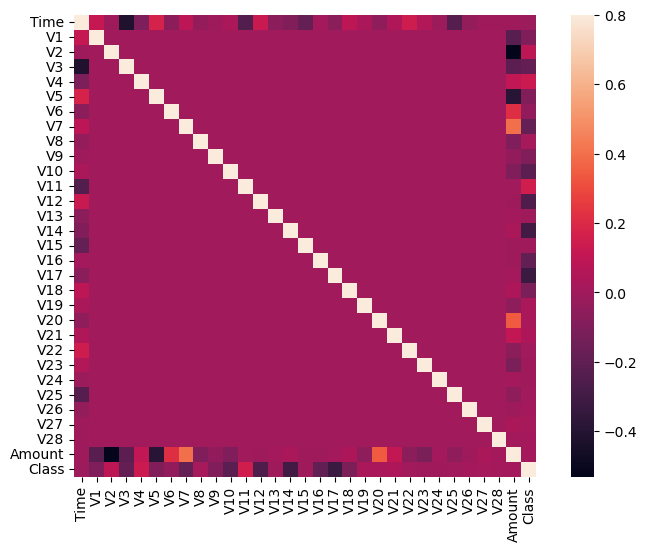

In [9]:
# Matriz de Correlação
corrmat = df.corr()
fig = plt.figure(figsize = (9, 6))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Podemos ver claramente no gráfico que a maioria dos recursos não se correlacionam, mas existem alguns recursos que tem correlação positiva ou negativa entre si.

Por exemplo, V2 e V5 são altamente correlacionados negativamente com o recurso Amount.

Também vemos alguma correlação com V20 e Amount, o que nos dá uma compreensão mais profunda dos dados disponíveis.

###  <font color="#483D8B">Separando os valores </font>

In [10]:
# Dividindo o X e o Y do dataset
X = df.drop(['Class'], axis =1)
Y = df['Class']
print(X.shape)
print(Y.shape)

# Obtendo apenas os valores para processar (array numpy sem colunas)
xDF = X.values
yDF = Y.values

(284807, 30)
(284807,)


###  <font color="#483D8B">Divisão de dados de treinamento e teste </font>

Dividiremos o conjunto de dados em dois grupos principais. Um para treinar o modelo e outro para testar o desempenho do nosso modelo treinado.

In [11]:
# Divisão dos dados em treinamento e teste usando Scikit-learn
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split ( xDF, yDF, test_size = 0.2, random_state = 42)

###  <font color="#483D8B">Construindo um modelo Random Forest </font>

In [12]:
# Construindo o classificador Random Forest
from sklearn.ensemble import RandomForestClassifier

# Construção do modelo
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

# Previsões
yPred = rfc.predict(xTest)

###  <font color="#483D8B">Construindo todos os tipos de parâmetros de avaliação </font>

In [18]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print('O modelo usado é o classificador Random Forest')
  
acc = accuracy_score(yTest, yPred)
print('A acurácia é {}'.format(acc))
  
prec = precision_score(yTest, yPred)
print('A precisão é {}'.format(prec))
  
rec = recall_score(yTest, yPred)
print('O recall é {}'.format(rec))
  
f1 = f1_score(yTest, yPred)
print('O F1-Score é {}'.format(f1))
  
MCC = matthews_corrcoef(yTest, yPred)
print('O coeficiente de correlação é {}'.format(MCC))

O modelo usado é o classificador Random Forest
A acurácia é 0.9995786664794073
A precisão é 0.9743589743589743
O recall é 0.7755102040816326
O F1-Score é 0.8636363636363635
O coeficiente de correlação é 0.8690748763736589


###  <font color="#483D8B">Visualizando a matriz de confusão </font>

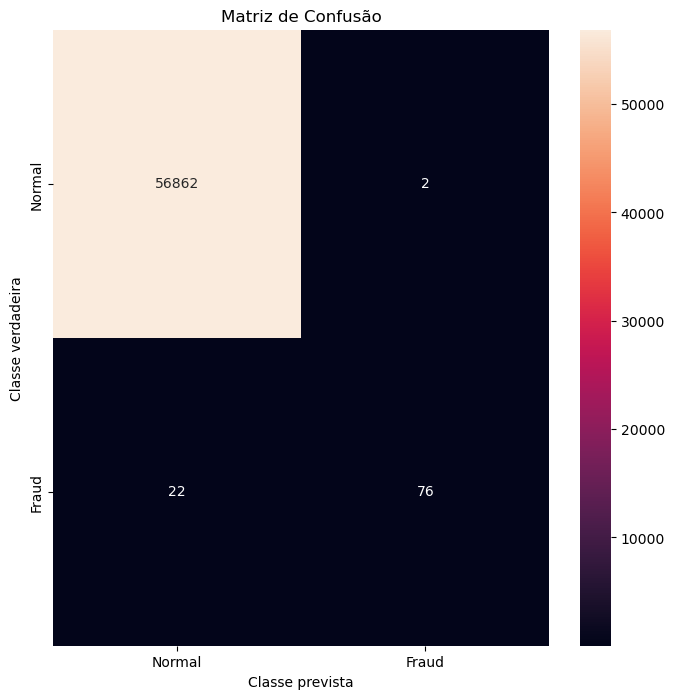

In [15]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize = (8, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = 'd');
plt.title('Matriz de Confusão')
plt.ylabel('Classe verdadeira')
plt.xlabel('Classe prevista')
plt.show()

###  <font color="#483D8B">Comparação com outros algoritmos sem lidar com o desbalanceamento dos dados.</font>

![other-fraud-detection-accuracies%20%281%29%20(1).jpg](attachment:other-fraud-detection-accuracies%20%281%29%20(1).jpg)
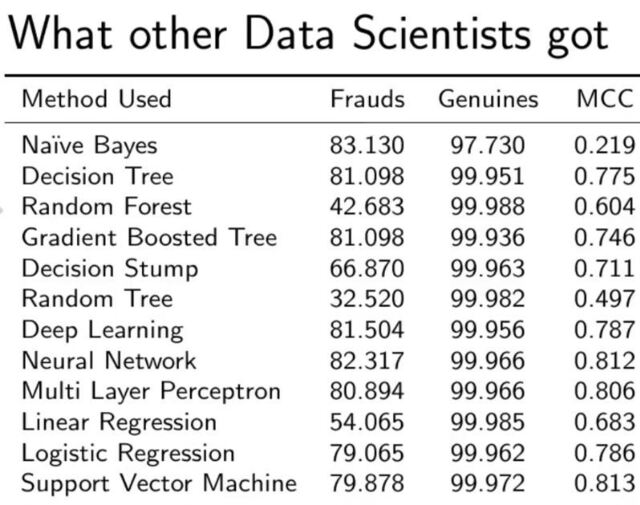

###  <font color="#008080">Podemos concluir que com o modelo Random Forest, obtemos um resultado melhor até mesmo para a pontuação de recuperação (recall) que é a parte mais complicada.